# **Import**

In [1]:
from fastai.vision.all import *

# **Data**

In [2]:
path = untar_data(URLs.PETS) / 'images'

In [3]:
path #이미지가 저장된 위치

Path('/root/.fastai/data/oxford-iiit-pet/images')

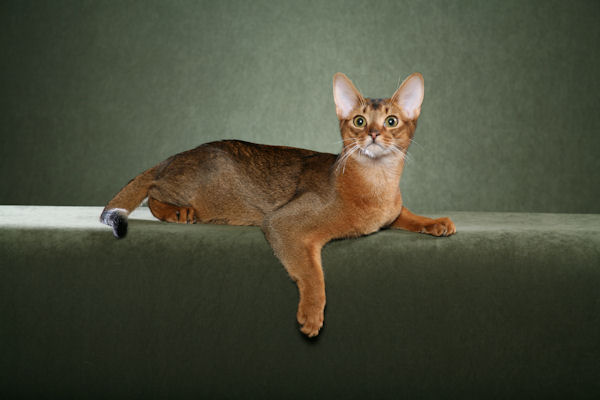

In [4]:
# Abyssinian_1.jpg 이미지 확인

PILImage.create('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [5]:
# get_image_files --> 하나의 폴더에서 모든 이미지 파일을 가져오는데 도움이 되는 fastai 함수

files = get_image_files(path)
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_145.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_80.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_183.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_169.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_72.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_73.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_187.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_63.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_110.jpg')...]

In [6]:
files[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_145.jpg')

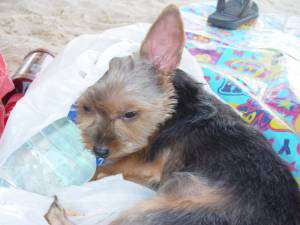

In [7]:
PILImage.create(files[0])

/root/.fastai/data/oxford-iiit-pet/images/newfoundland_80.jpg


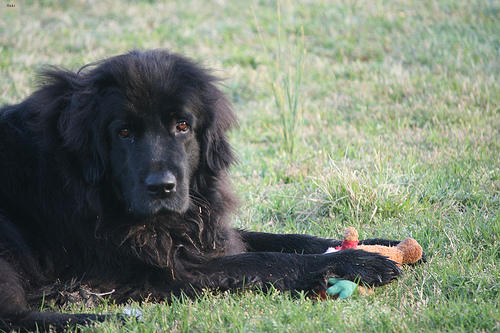

In [8]:
print(files[1])
PILImage.create(files[1])

In [9]:
# 데이터의 특징 --> 대문자로 시작하면 고양이, 소문자로 시작하면 강아지
# 데이터의 특징 --> 이미지의 크기가 모두 다름

In [10]:
def label_func(fname):
  if fname[0].isupper():
    return 'cat'
  else:
    return 'dog'

In [11]:
# path 경로에서 files 데이터를 불러와 X를 생성
# label_func의 함수내용을 바탕으로 y 생성
# item_tfms에 정의된 방식으로 X를 변환하여 저장

dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms = Resize(224))

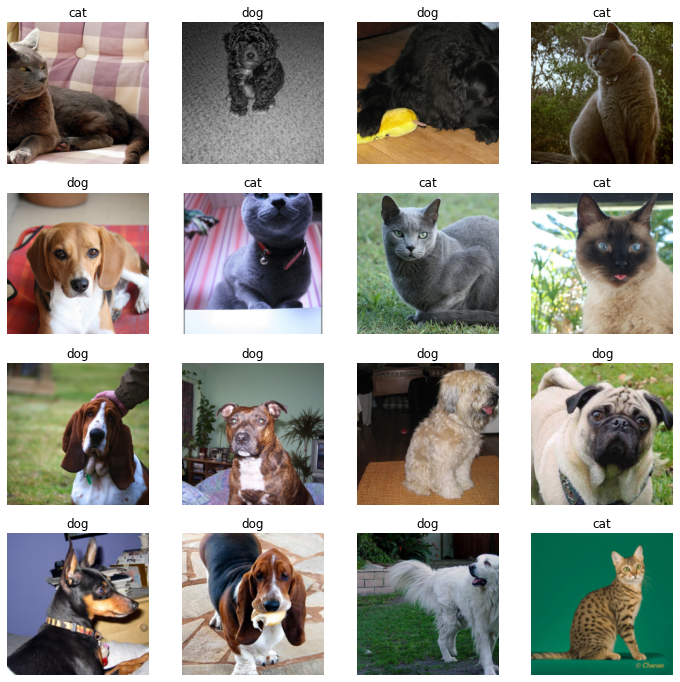

In [12]:
dls.show_batch(max_n = 16)

# **학습**

In [13]:
clsfr = cnn_learner(dls, resnet34, metrics = error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [14]:
clsfr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.143767,0.024086,0.010825,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.058978,0.017286,0.006766,00:52


# 정확도 **예측**

In [15]:
files[0] # 강아지

Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_145.jpg')

In [17]:
clsfr.predict(files[0])

('dog', TensorBase(1), TensorBase([2.6449e-07, 1.0000e+00]))

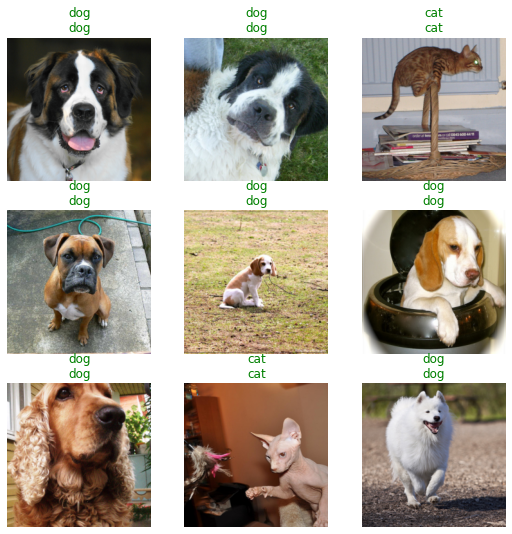

In [18]:
clsfr.show_results()

# **오답분석**

In [19]:
interpreter = Interpretation.from_learner(clsfr)

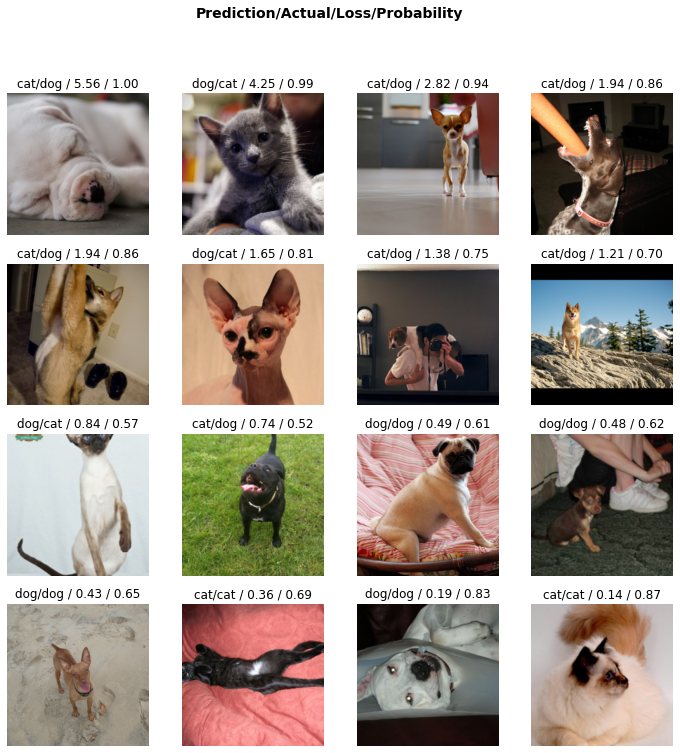

In [20]:
interpreter.plot_top_losses(16)